In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t as Student
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

from dataloaders import SKLMatchedPairsCGL
from evaluation import evaluate

## Unmatched halves without hyperparameter tuning

### Load data

In [19]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03/'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04/'

data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='unmatched_halves', seed=1234)

### Fit classifier

In [3]:
clf = AdaBoostClassifier(algorithm = 'SAMME', random_state=data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

AdaBoostClassifier(algorithm='SAMME', random_state=np.int64(421))

### Evaluate

In [4]:
predict = clf.predict(data.X_test)
eval_metrics = evaluate(predict, data.y_test)
print(eval_metrics)

{'accuracy': np.float64(0.867), 'PPV': np.float64(0.8398148148148148), 'NPV': np.float64(0.8989130434782608), 'sensitivity': np.float64(0.907), 'specificity': np.float64(0.827), 'F-score': np.float64(0.8721153846153847)}


## Matched pairs without hyperparameter tuning

### Load data

In [5]:
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='half_matches', seed=1234)

### Fit classifier

In [6]:
clf = AdaBoostClassifier(algorithm = 'SAMME', random_state=data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

AdaBoostClassifier(algorithm='SAMME', random_state=np.int64(421))

### Evaluate

In [7]:
predict = clf.predict(data.X_test)
eval_metrics = evaluate(predict, data.y_test)
print(eval_metrics)

{'accuracy': np.float64(0.8805), 'PPV': np.float64(0.8778550148957299), 'NPV': np.float64(0.8831822759315207), 'sensitivity': np.float64(0.884), 'specificity': np.float64(0.877), 'F-score': np.float64(0.8809167912306926)}


## All matched pairs

### Load data

In [8]:
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='all_matches', seed=1234)

### Fit classifier

In [9]:
clf = AdaBoostClassifier(algorithm = 'SAMME', random_state=data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

AdaBoostClassifier(algorithm='SAMME', random_state=np.int64(421))

### Evaluate

In [10]:
predict = clf.predict(data.X_test)
eval_metrics = evaluate(predict, data.y_test)
print(eval_metrics)

{'accuracy': np.float64(0.887), 'PPV': np.float64(0.8692748091603053), 'NPV': np.float64(0.9065126050420168), 'sensitivity': np.float64(0.911), 'specificity': np.float64(0.863), 'F-score': np.float64(0.8896484375000001)}


## Summary of all the matched(half-sized), unmatched(half-sized), and matched(full-sized) dataset

{'accuracy': np.float64(0.887), 'PPV': np.float64(0.8692748091603053), 'NPV': np.float64(0.9065126050420168), 'sensitivity': np.float64(0.911), 'specificity': np.float64(0.863), 'F-score': np.float64(0.8896484375000001)}
{'accuracy': np.float64(0.887), 'PPV': np.float64(0.8692748091603053), 'NPV': np.float64(0.9065126050420168), 'sensitivity': np.float64(0.911), 'specificity': np.float64(0.863), 'F-score': np.float64(0.8896484375000001)}
{'accuracy': np.float64(0.887), 'PPV': np.float64(0.8692748091603053), 'NPV': np.float64(0.9065126050420168), 'sensitivity': np.float64(0.911), 'specificity': np.float64(0.863), 'F-score': np.float64(0.8896484375000001)}


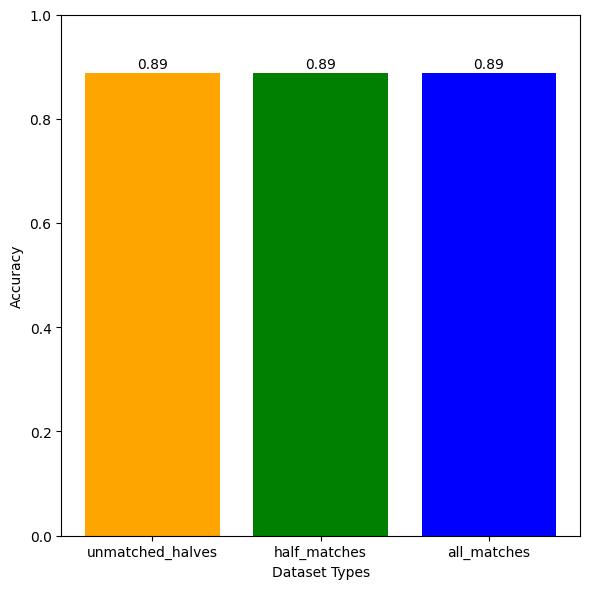

In [53]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'

dataset_types = ['unmatched_halves', 'half_matches', 'all_matches']
accuracies = []

for dataset_type in dataset_types:

    data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match = dataset_type, seed = 1234)
    clf = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, algorithm = 'SAMME', random_state = data.rng.integers(data.seed))

    clf.fit(data.X_train, data.y_train)
    y_test_pred = clf.predict(data.X_test)

    eval_metrics = evaluate(predict, data.y_test)
    print(eval_metrics)
    accuracies.append(eval_metrics['accuracy'])

plt.figure(figsize=(6, 6))
bars = plt.bar(dataset_types, accuracies, color=['Orange', 'Green', 'Blue'])

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{acc:.2f}', ha='center', va='bottom')

plt.xlabel('Dataset Types')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Evaluation of the n_estimators and learning rate

In [21]:
estimators = [16, 32, 64, 128, 256]
learning_rates = [0.25, 0.5, 1, 2]

runs = 10

len_estimators = len(estimators)
len_lrs = len(learning_rates)
all_accuracy = np.zeros((len_estimators, len_lrs, runs))
all_ppv = np.zeros((len_estimators, len_lrs, runs))
all_npv = np.zeros((len_estimators, len_lrs, runs))
all_sensitivity = np.zeros((len_estimators, len_lrs, runs))
all_specificity = np.zeros((len_estimators, len_lrs, runs))
all_f = np.zeros((len_estimators, len_lrs, runs))

for i, current_n_estimators in enumerate(estimators):
    for j, current_learning_rate in enumerate(learning_rates):
        for random_state in tqdm(range(runs), desc='n_estimators = {}, lr = {}'.format(current_n_estimators, current_learning_rate)):
            clf = AdaBoostClassifier(n_estimators = current_n_estimators,
                                        learning_rate = current_learning_rate,
                                        algorithm = 'SAMME',
                                        random_state=random_state)
            clf.fit(data.X_train, data.y_train)
            predict = clf.predict(data.X_dev)
            eval_metrics = evaluate(predict, data.y_dev)
            
            all_accuracy[i, j, random_state] = eval_metrics['accuracy']
            all_ppv[i, j, random_state] = eval_metrics['PPV']
            all_npv[i, j, random_state] = eval_metrics['NPV']
            all_sensitivity[i, j, random_state] = eval_metrics['sensitivity']
            all_specificity[i, j, random_state] = eval_metrics['specificity']
            all_f[i, j, random_state] = eval_metrics['F-score']

n_estimators = 256, lr = 2: 100%|██████████| 10/10 [1:03:22<00:00, 380.26s/it]


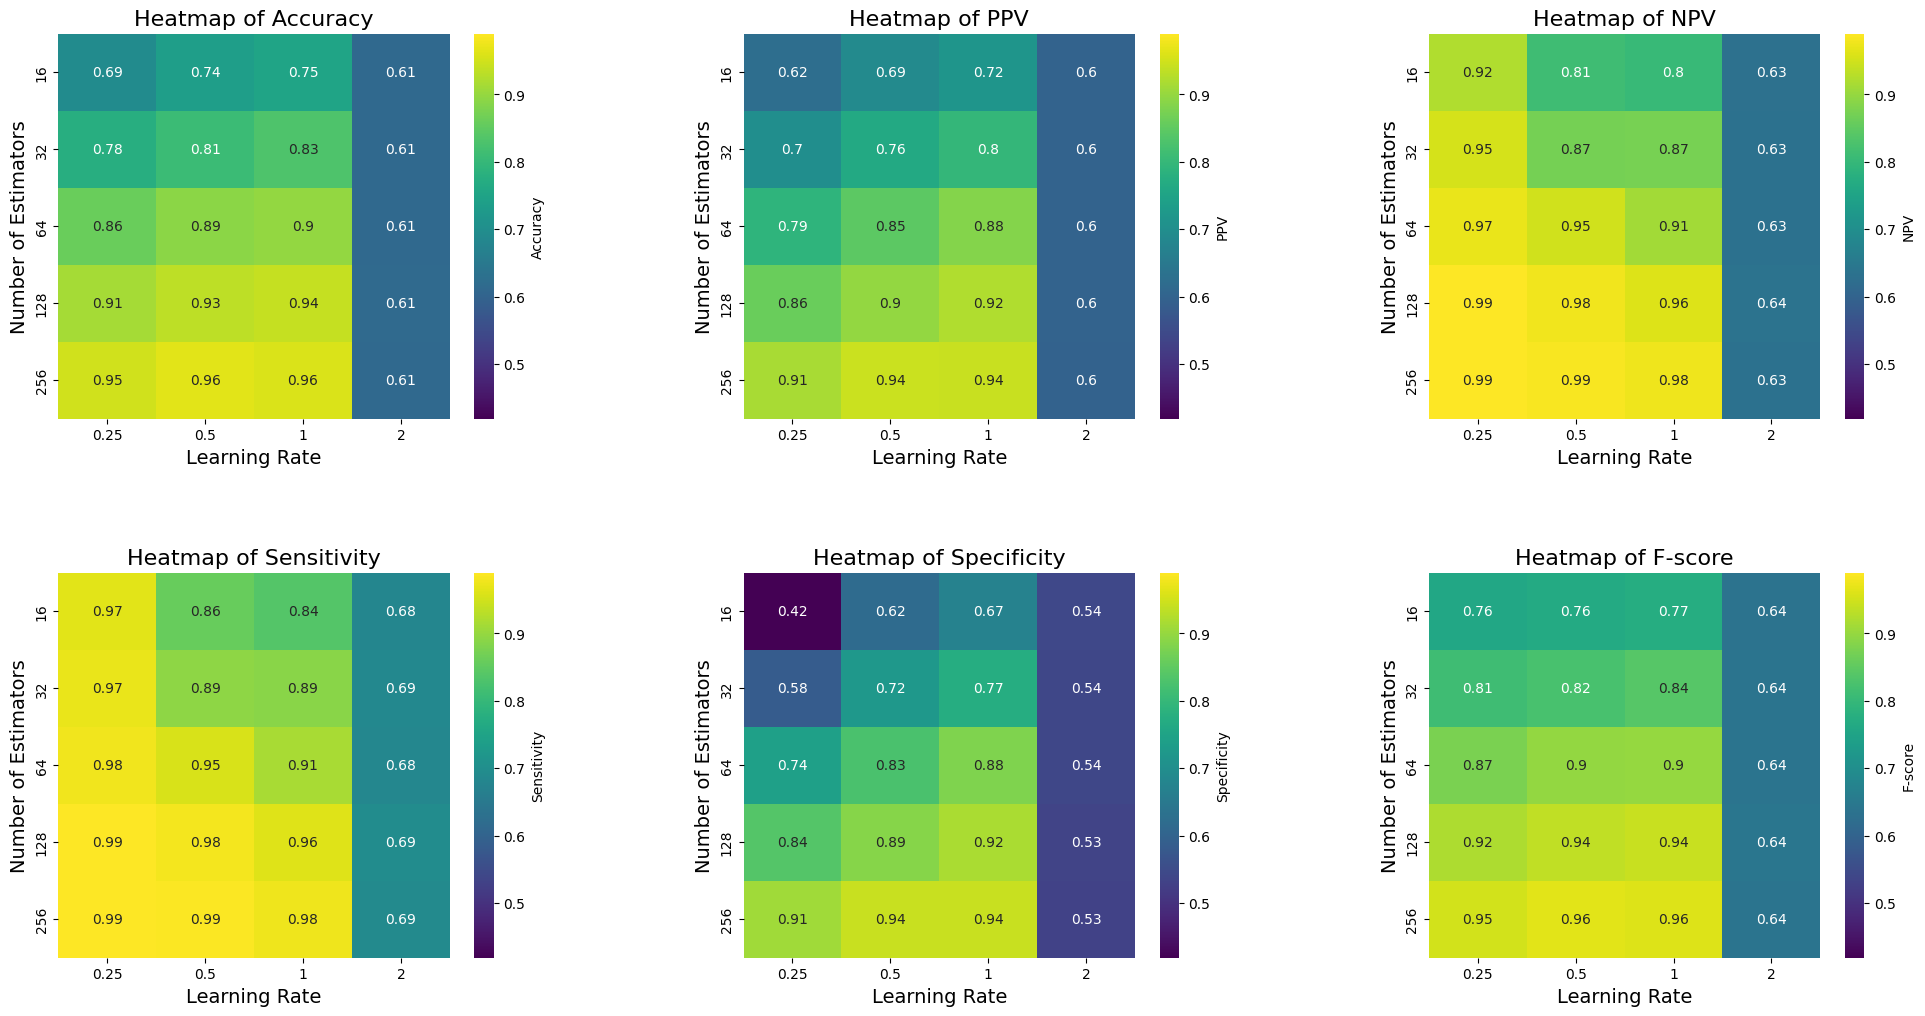

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

metrics = {
    'Accuracy': np.mean(all_accuracy, axis=2),
    'PPV': np.mean(all_ppv, axis=2),
    'NPV': np.mean(all_npv, axis=2),
    'Sensitivity': np.mean(all_sensitivity, axis=2),
    'Specificity': np.mean(all_specificity, axis=2),
    'F-score': np.mean(all_f, axis=2)
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))
axes = axes.flatten()

vmin = min(metrics[label].min() for label in metrics)
vmax = max(metrics[label].max() for label in metrics)

for i, (metric_name, mean_metric) in enumerate(metrics.items()):
    sns.heatmap(data = mean_metric, vmin = vmin, vmax = vmax, annot = True, cmap = 'viridis',  ax=axes[i],
                xticklabels = learning_rates, yticklabels = estimators, cbar=True, cbar_kws={"label": metric_name})
    
    axes[i].set_title(f'Heatmap of {metric_name}', fontsize=16)
    axes[i].set_xlabel('Learning Rate', fontsize=14)
    axes[i].set_ylabel('Number of Estimators', fontsize=14)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### Train final model and interpret

In [42]:
clf = AdaBoostClassifier(n_estimators=128, learning_rate = 1, algorithm = 'SAMME', random_state=data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=128,
                   random_state=np.int64(754))

In [43]:
importances = clf.feature_importances_.reshape((2, 32, 32))

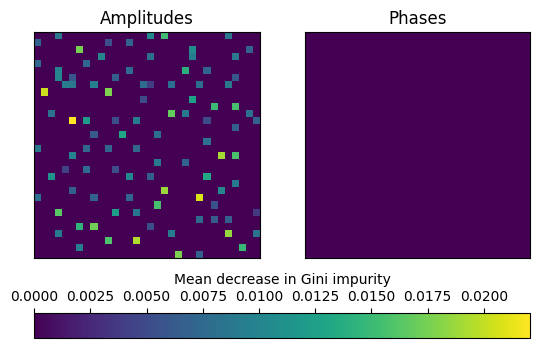

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)

vmin = min(importances[i].min() for i in range(2))
vmax = max(importances[i].max() for i in range(2))

im1 = ax1.imshow(importances[0], vmin=vmin, vmax=vmax)
ax2.imshow(importances[1], vmin=vmin, vmax=vmax)

ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])

ax1.set_title('Amplitudes')
ax2.set_title('Phases')

cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='horizontal')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.set_label("Mean decrease in Gini impurity")

In [45]:
count = 0
for i in importances:
    for j in i:
        for k in j:
            if k > 0.00000001:
                count += 1
print(count)

99
